C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8047 - loss: 0.6955 - val_accuracy: 0.8663 - val_loss: 0.5152
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8587 - loss: 0.5461 - val_accuracy: 0.8763 - val_loss: 0.5774
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8662 - loss: 0.5352 - val_accuracy: 0.8342 - val_loss: 0.6166
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8534 - loss: 0.5698 - val_accuracy: 0.8712 - val_loss: 0.5027
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8636 - loss: 0.5319 - val_accuracy: 0.8001 - val_loss: 0.7348
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8526 - loss: 0.5666 - val_accuracy: 0.8589 - val_loss: 0.7699
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8479 - loss: 0.5968 - val_accuracy: 0.8471 - val_loss: 0.6594
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8531 - loss: 0.5606

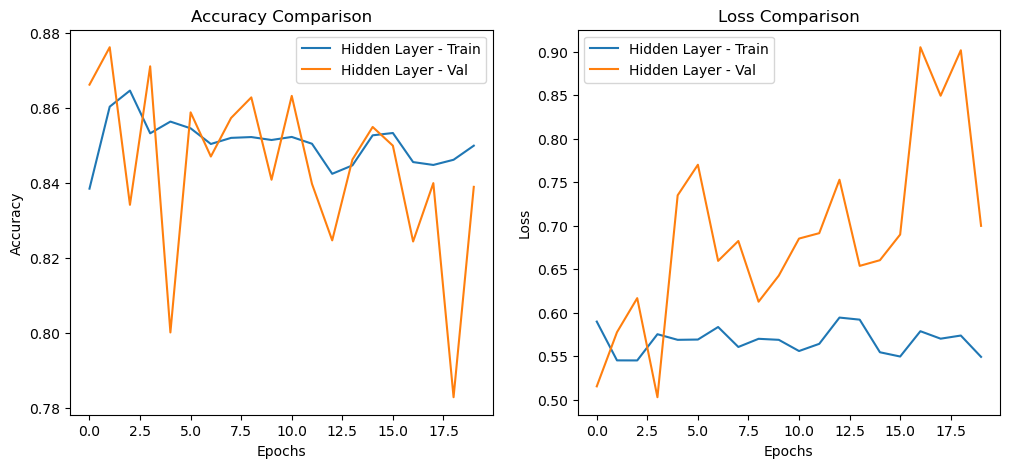

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load dataset (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with a hidden layer
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),   # Flatten 28x28 image into 784-dimensional vector
        Dense(50, activation='relu'),    # Hidden layer with 50 neurons (ReLU activation)
        Dense(10, activation='softmax')  # Output layer (10 neurons for digit classification)
    ])
    model.compile(optimizer=Adam(learning_rate=0.05), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Train the new model with hidden layer
model_hidden = create_model()
history_hidden = model_hidden.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

# Function to plot accuracy and loss curves
def plot_comparison(history_hidden, history_baseline=None):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history_hidden.history['accuracy'], label='Hidden Layer - Train')
    plt.plot(history_hidden.history['val_accuracy'], label='Hidden Layer - Val')
    if history_baseline:
        plt.plot(history_baseline.history['accuracy'], label='Baseline - Train', linestyle='dashed')
        plt.plot(history_baseline.history['val_accuracy'], label='Baseline - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Comparison')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history_hidden.history['loss'], label='Hidden Layer - Train')
    plt.plot(history_hidden.history['val_loss'], label='Hidden Layer - Val')
    if history_baseline:
        plt.plot(history_baseline.history['loss'], label='Baseline - Train', linestyle='dashed')
        plt.plot(history_baseline.history['val_loss'], label='Baseline - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Comparison')

    plt.show()

# Plot results (baseline comparison can be added if available)
plot_comparison(history_hidden)
